In [1]:
import pandas as pd
import math
sales=pd.read_csv('supermarket_sales - Sheet1.csv')
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [2]:
#Make a month and week column for easier analysis
sales['Month']= sales['Date'].str[0]
sales['Month']=sales['Month'].astype('int32')

#Pulling the day out of the purchase
sales['Week']=sales['Date'].apply(lambda x: x.split('/')[1])
sales['Week']=sales['Week'].astype('int32')

#Creating a week system for grouping purchases
sales['Week']=sales['Week']//7
sales.loc[sales['Month']== 2, 'Week'] += 4
sales.loc[sales['Month']== 3, 'Week'] += 8

sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,9
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,8
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,3
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,5


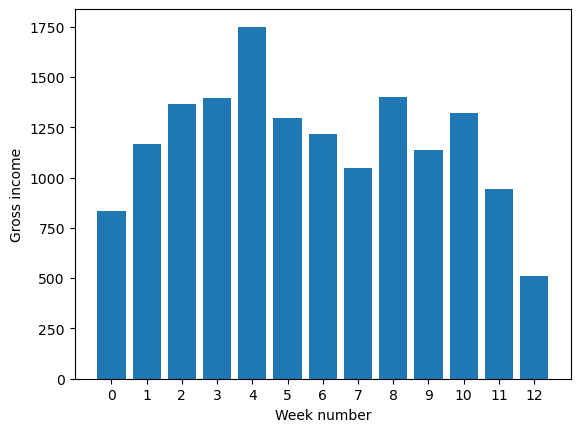

In [3]:
import matplotlib.pyplot as plt

results=sales.groupby('Week').sum()
weeks= range(0,13)
plt.bar(weeks,results['gross income'])
plt.xticks(weeks)
plt.ylabel('Gross income')
plt.xlabel('Week number')
plt.show()

The best overall week was week 4, which is week 1 of Febuary 

#### What was the best selling product line?




In [4]:
product_lines=sales['Product line'].unique()
print(product_lines)

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


there is a total of 6 different product lines

In [5]:
product_results=sales.groupby('Product line').sum()
print(product_results['gross income'])
#Change the product line array to make the graph accurate and abbreviate
product_lines[0]='Ea'
product_lines[1]='Fa'
product_lines[2]='Fb'
product_lines[3]='Hb'
product_lines[4]='Hl'
product_lines[5]='St'


Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64


<BarContainer object of 6 artists>

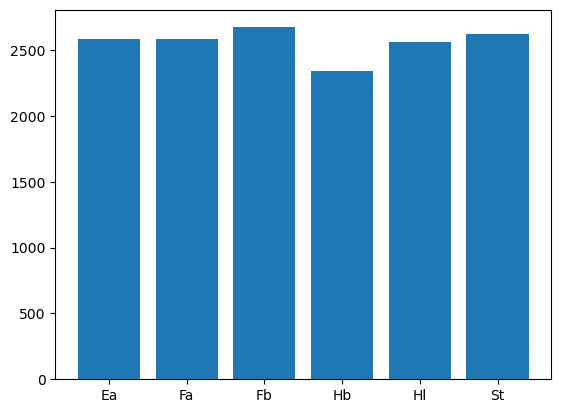

In [6]:
plt.bar(product_lines,product_results['gross income'])

All of the products have relatively the same gross income, all around 2550, with the lowest gross income being Health and Beauty products

#### Average gross income per product sale

This will not factor in the quantity bought of each sale

In [7]:
ea_tot=len(sales.loc[sales['Product line']=='Electronic accessories'])
fa_tot=len(sales.loc[sales['Product line']=='Fashion accessories'])
hb_tot=len(sales.loc[sales['Product line']=='Health and beauty'])
fb_tot=len(sales.loc[sales['Product line']=='Food and beverages'])
hl_tot=len(sales.loc[sales['Product line']=='Home and lifestyle'])
st_tot=len(sales.loc[sales['Product line']=='Sports and travel'])
prod_tot=[ea_tot,fa_tot,fb_tot,hb_tot,hl_tot,st_tot]

ea_avg=product_results['gross income']['Electronic accessories']/ea_tot
fa_avg=product_results['gross income']['Fashion accessories']/fa_tot
hb_avg=product_results['gross income']['Health and beauty']/hb_tot
fb_avg=product_results['gross income']['Food and beverages']/fb_tot
hl_avg=product_results['gross income']['Home and lifestyle']/hl_tot
st_avg=product_results['gross income']['Sports and travel']/st_tot
prod_avg=[ea_avg,fa_avg,fb_avg,hb_avg,hl_avg,st_avg]

Text(0.5, 0, 'Product lines')

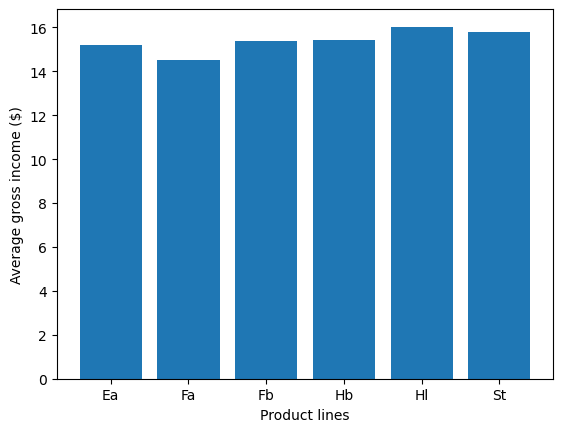

In [8]:
plt.bar(product_lines,prod_avg)
plt.ylabel('Average gross income ($)')
plt.xlabel('Product lines')

Text(0.5, 0, 'Product lines')

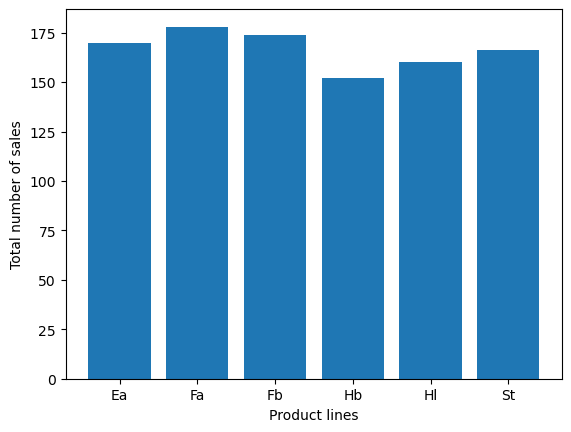

In [9]:
plt.bar(product_lines,prod_tot)
plt.ylabel('Total number of sales')
plt.xlabel('Product lines')

Surprisingly, the total number of sales is down for Health and Beauty products, but the average gross income is about average for Health and beauty

#### Next look at the Cities and branches

In [10]:
branch_list=sales['Branch'].unique()
print(branch_list)

['A' 'C' 'B']


In [11]:
Branch_results=sales.groupby('Branch').sum()
print(Branch_results['gross income'])

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64


Branch C has the largest gross income of the 3 branches, the other two have the same income, next we should see why this is the case

### Branch sales and What the products sold are

In [12]:
salesn=len(sales.loc[sales['City']=='Naypyitaw'])
print(salesn)

328


In [13]:
salesm=len(sales.loc[sales['City']=='Mandalay'])
print(salesm)

332


In [14]:
salesy=len(sales.loc[sales['City']=='Yangon'])
print(salesy)

340


Amount of sales for Naypyitaw is lower compared to the other cities, so that isn't the reason

Lets break down the product line sales in each city

In [15]:
###Abbreviating some words to make algorithms easier to create
sales.loc[sales['Product line']=='Electronic accessories', 'Product line']= 'ea'
sales.loc[sales['Product line']=='Health and beauty', 'Product line']= 'hb'
sales.loc[sales['Product line']=='Fashion accessories', 'Product line']= 'fa'
sales.loc[sales['Product line']=='Food and beverages', 'Product line']= 'fb'
sales.loc[sales['Product line']=='Home and lifestyle', 'Product line']= 'hl'
sales.loc[sales['Product line']=='Sports and travel', 'Product line']= 'st'

sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Week
0,750-67-8428,A,Yangon,Member,Female,hb,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,ea,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,9
2,631-41-3108,A,Yangon,Normal,Male,hl,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,8
3,123-19-1176,A,Yangon,Member,Male,hb,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,3
4,373-73-7910,A,Yangon,Normal,Male,st,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,5


In [16]:
prod_sales_n=[0,0,0,0,0,0]
prod_sales_n[0]=sales.loc[(sales['Branch']=='C') & (sales['Product line']=='ea')]['gross income'].sum()
prod_sales_n[1]=sales.loc[(sales['Branch']=='C') & (sales['Product line']=='fa')]['gross income'].sum()
prod_sales_n[2]=sales.loc[(sales['Branch']=='C') & (sales['Product line']=='fb')]['gross income'].sum()
prod_sales_n[3]=sales.loc[(sales['Branch']=='C') & (sales['Product line']=='hb')]['gross income'].sum()
prod_sales_n[4]=sales.loc[(sales['Branch']=='C') & (sales['Product line']=='hl')]['gross income'].sum()
prod_sales_n[5]=sales.loc[(sales['Branch']=='C') & (sales['Product line']=='st')]['gross income'].sum()

In [17]:
prod_sales_m=[0,0,0,0,0,0]
prod_sales_m[0]=sales.loc[(sales['Branch']=='B') & (sales['Product line']=='ea')]['gross income'].sum()
prod_sales_m[1]=sales.loc[(sales['Branch']=='B') & (sales['Product line']=='fa')]['gross income'].sum()
prod_sales_m[2]=sales.loc[(sales['Branch']=='B') & (sales['Product line']=='fb')]['gross income'].sum()
prod_sales_m[3]=sales.loc[(sales['Branch']=='B') & (sales['Product line']=='hb')]['gross income'].sum()
prod_sales_m[4]=sales.loc[(sales['Branch']=='B') & (sales['Product line']=='hl')]['gross income'].sum()
prod_sales_m[5]=sales.loc[(sales['Branch']=='B') & (sales['Product line']=='st')]['gross income'].sum()

In [18]:
prod_sales_y=[0,0,0,0,0,0]
prod_sales_y[0]=sales.loc[(sales['Branch']=='A') & (sales['Product line']=='ea')]['gross income'].sum()
prod_sales_y[1]=sales.loc[(sales['Branch']=='A') & (sales['Product line']=='fa')]['gross income'].sum()
prod_sales_y[2]=sales.loc[(sales['Branch']=='A') & (sales['Product line']=='fb')]['gross income'].sum()
prod_sales_y[3]=sales.loc[(sales['Branch']=='A') & (sales['Product line']=='hb')]['gross income'].sum()
prod_sales_y[4]=sales.loc[(sales['Branch']=='A') & (sales['Product line']=='hl')]['gross income'].sum()
prod_sales_y[5]=sales.loc[(sales['Branch']=='A') & (sales['Product line']=='st')]['gross income'].sum()

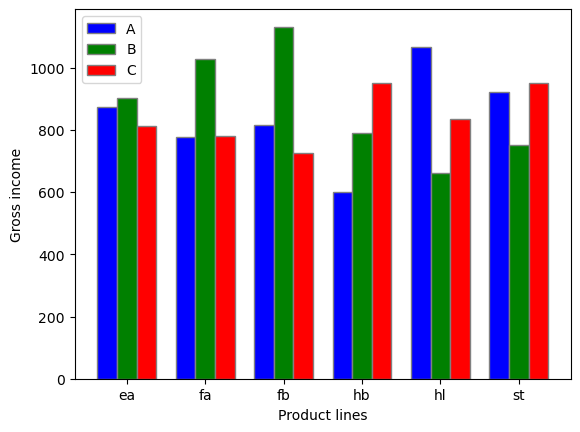

In [19]:
import numpy as np
br1=np.arange(len(product_lines))
br2=[x + 0.25 for x in br1]
br3=[x + 0.25 for x in br2]

plt.bar(br1,prod_sales_y,color='b',width=0.25,edgecolor='grey',label='A')
plt.bar(br2,prod_sales_n,color='g',width=0.25,edgecolor='grey',label='B')
plt.bar(br3,prod_sales_m,color='r',width=0.25,edgecolor='grey',label='C')

plt.ylabel('Gross income')
plt.xlabel('Product lines')

plt.xticks([r+0.25 for r in range(len(product_lines))], ['ea','fa','fb','hb','hl','st'])

plt.legend()
plt.show()

The gross margin for Branch 'B' is significantly higher for Food and Beverages products and Fashion Accessories compared to the other branches

#### Take aways from this part of analysis:

None of the product lines have any significant margin of income difference, meaning that branches that struggle with a product line sales should focus on increasing that specific line to increase growth.  
Branch C, which is the city of Naypyitaw, has the largest gross income, while the other two branches have roughly the same gross income, being about 200 dollars behind branch C.
Recommendations for Branch A, would be to incentivize Health and beauty product sales to match the other product lines sold at the branch
Recommendations for Branch B, would be to incentivize Home and lifestyle product sales, for the same reason as branch A.

#### Customer analysis and ratings

In [20]:
sales.loc[sales['Gender']=='Male','Gender']=1
sales.loc[sales['Gender']=='Female','Gender']=0
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Week
0,750-67-8428,A,Yangon,Member,0,hb,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,0,ea,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,9
2,631-41-3108,A,Yangon,Normal,1,hl,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,8
3,123-19-1176,A,Yangon,Member,1,hb,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,3
4,373-73-7910,A,Yangon,Normal,1,st,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,5


In [32]:
print(len(sales.loc[sales['Gender']==0]))
print(len(sales.loc[sales['Gender']==1]))

501
499


In [22]:
product_lines=sales['Product line'].unique()

In [35]:
male_product_sales=[0,0,0,0,0,0]
ind=0

for product in product_lines:
    male_product_sales[ind]=len((sales.loc[(sales['Gender']==1) & (sales['Product line']==product)]))
    ind +=1
print(male_product_sales)

[88, 86, 81, 78, 84, 82]


In [37]:
female_product_sales=[0,0,0,0,0,0]
ind=0

for product in product_lines:
    female_product_sales[ind]=len((sales.loc[(sales['Gender']==0) & (sales['Product line']==product)]))
    ind +=1
print(female_product_sales)

[64, 84, 79, 88, 90, 96]


#### Relationship between Genders and product lines individual sales

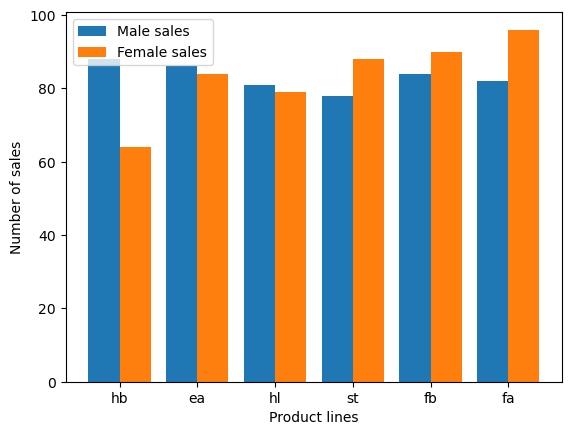

In [42]:
X_axis=np.arange(len(product_lines))
plt.bar(X_axis-0.2, male_product_sales, 0.4, label = 'Male sales')
plt.bar(X_axis+0.2,female_product_sales,0.4,label='Female sales')
plt.xticks(X_axis,product_lines)
plt.xlabel('Product lines')
plt.ylabel('Number of sales')
plt.legend()
plt.show()

The largest difference between genders, is the health and beauty product line, where Male customers have about 25 more sales, 

#### Gender sales and gross income

In [46]:
male_product_income=[0,0,0,0,0,0]
female_product_income=[0,0,0,0,0,0]
ind=0
for product in product_lines:
    male_product_income[ind]=sales.loc[(sales['Gender']==1) & (sales['Product line']==product)]['gross income'].sum()
    ind+=1
ind=0
for product in product_lines:
    female_product_income[ind]=sales.loc[(sales['Gender']==0) & (sales['Product line']==product)]['gross income'].sum()
    ind+=1

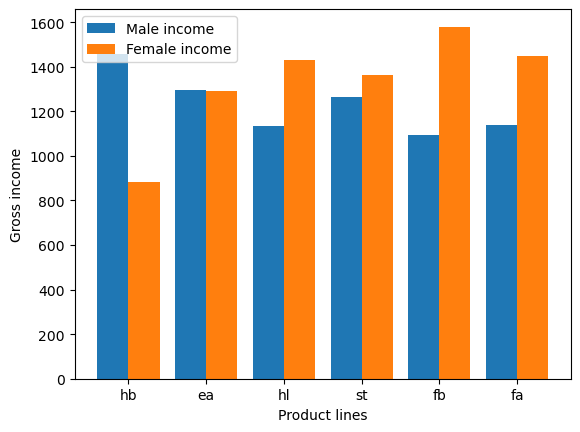

In [47]:
X_axis=np.arange(len(product_lines))
plt.bar(X_axis-0.2, male_product_income, 0.4, label = 'Male income')
plt.bar(X_axis+0.2,female_product_income,0.4,label='Female income')
plt.xticks(X_axis,product_lines)
plt.xlabel('Product lines')
plt.ylabel('Gross income')
plt.legend()
plt.show()

Health and beauty products have a significant difference still between male and female customers however, the rest of the product lines have female customers having a much higher gross income, which is surprising due to the relativly equal sales between each group.

In [66]:
male_product_quantity=[0,0,0,0,0,0]
female_product_quantity=[0,0,0,0,0,0]
ind=0
for product in product_lines:
    male_product_quantity[ind]=sales.loc[(sales['Gender']==1) & (sales['Product line']==product)]['Quantity'].sum()
    ind+=1
ind=0
for product in product_lines:
    female_product_quantity[ind]=sales.loc[(sales['Gender']==0) & (sales['Product line']==product)]['Quantity'].sum()
    ind+=1
print(male_product_quantity)
print(female_product_quantity)

[511, 483, 413, 424, 438, 372]
[343, 488, 498, 496, 514, 530]


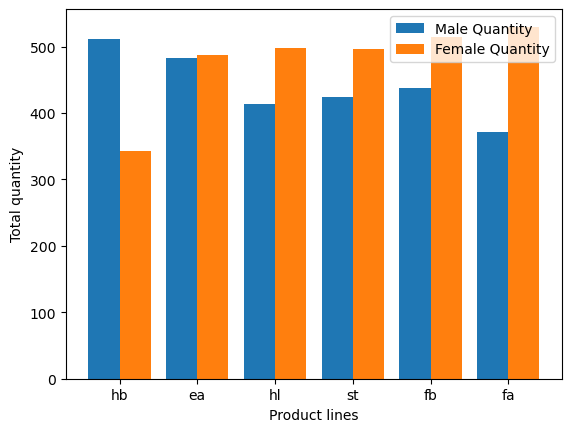

In [49]:
X_axis=np.arange(len(product_lines))
plt.bar(X_axis-0.2, male_product_quantity, 0.4, label = 'Male Quantity')
plt.bar(X_axis+0.2,female_product_quantity,0.4,label='Female Quantity')
plt.xticks(X_axis,product_lines)
plt.xlabel('Product lines')
plt.ylabel('Total quantity')
plt.legend()
plt.show()

This makes more sense comparing to the two graphs shown above, and proves that female customers buy a higher quantity of products per sale compared to male customers, besides health and beauty products.

#### Health and beauty products and each branch

In [69]:
male_hb_branch=[0,0,0]
female_hb_branch=[0,0,0]
ind=0
for branch in branch_list:
    male_hb_branch[ind]=sales.loc[(sales['Gender']==1) & (sales['Product line']=='hb')&(sales['Branch']==branch)]['gross income'].sum()
    ind+=1
ind=0
for branch in branch_list:
    female_hb_branch[ind]=sales.loc[(sales['Gender']==0) & (sales['Product line']=='hb')&(sales['Branch']==branch)]['gross income'].sum()
    ind+=1

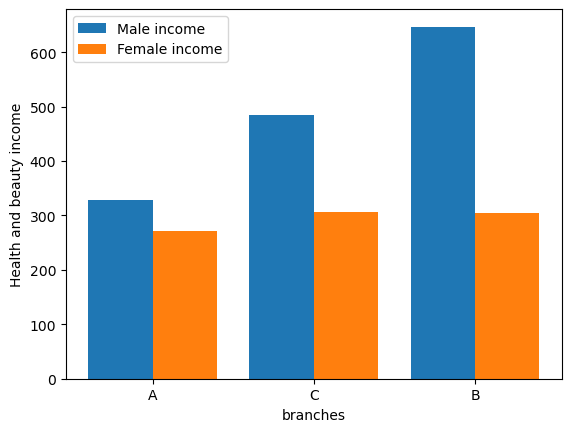

In [70]:
X_axis=np.arange(len(branch_list))
plt.bar(X_axis-0.2, male_hb_branch, 0.4, label = 'Male income')
plt.bar(X_axis+0.2,female_hb_branch,0.4,label='Female income')
plt.xticks(X_axis,branch_list)
plt.xlabel('branches')
plt.ylabel('Health and beauty income')
plt.legend()
plt.show()

The female customer income for health and beauty products is the same across all of the branches, but branch b and c have a much higher income for male customers for health and beauty product lines.  Further data on those branches will be necessary to determine why this is the case.

#### Member vs regular sales

In [83]:
member_sales_total=len(sales.loc[sales['Customer type']=='Member'])
regular_sales_Total=len(sales.loc[sales['Customer type']=='Normal'])
print(member_sales_total,regular_sales_Total)

501 499


Even number of sales for both customer types

In [89]:
member_product_profit=[0,0,0,0,0,0]
regular_product_profit=[0,0,0,0,0,0]
ind=0
for prod in product_lines:
    member_product_profit[ind]=sales.loc[(sales['Customer type']=='Member')&(sales['Product line']==prod)]['gross income'].sum()
    ind+=1
ind=0
for prod in product_lines:
    regular_product_profit[ind]=sales.loc[(sales['Customer type']=='Normal')&(sales['Product line']==prod)]['gross income'].sum()
    ind+=1

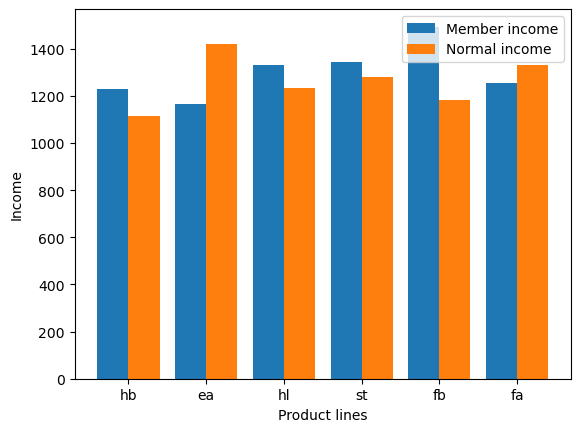

In [90]:
X_axis=np.arange(len(product_lines))
plt.bar(X_axis-0.2, member_product_profit, 0.4, label = 'Member income')
plt.bar(X_axis+0.2,regular_product_profit,0.4,label='Normal income')
plt.xticks(X_axis,product_lines)
plt.xlabel('Product lines')
plt.ylabel('Income')
plt.legend()
plt.show()

Member income is higher for Food and beverages compared to the rest of the product lines, and the normal customers result in a higher income for electronic accesories and fashion accessories compared to member income.